In [274]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
boston_obj = datasets.load_boston()

In [9]:
boston_df = pd.DataFrame(boston_obj.data, columns=boston_obj.feature_names)

In [12]:
boston_df['price'] = boston_obj.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Linear Regression Basics

We have the data set with $n$ rows and $p$ features. Target $y$ is a continuous value vector of shape $n\times 1$. We assume there is a linear relationship between the features and the target, and we try to fit a straight line to the features that best predict the target. The line takes the form 
$$\hat{y} = X\alpha + \beta,$$ where $\alpha\in R^{p\times 1}$ and $\beta\in R$. In other words, $\alpha$ is the coefficients of each feature, and $\beta$ is the intercept of the line on $y$-axis.

The objective is to find $\alpha$ and $\beta$ that minimize the mean squred error
$$g(\alpha, \beta) = (y - X\alpha + \beta e)T(y - X\alpha + \beta e),$$ which can be rewritten as 
$$g(\alpha, \beta) = (y - \tilde{X}\tilde\alpha)T(y - \tilde{X}\tilde\alpha),$$ where
$\tilde{X} = [X, e_n]$ and $\tilde\alpha = [\alpha^T, \beta]^T$

Since the objective is convex, we can solve it by setting the derivative to 0.
$$\frac{\partial g}{\partial\tilde\alpha} = -2\tilde{X}^T(y - \tilde{X}\tilde\alpha)$$

Setting $\frac{\partial g}{\tilde\alpha} = 0$, we get
$$\tilde\alpha = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^Ty$$

We can obtain $\tilde\alpha$ by solving the equation above, or we can also obtain it by using gradient descent, where the update for each iteration will be
$$\tilde\alpha_{i+1} = \tilde\alpha_{i} + 2\tilde{X}^T(y - \tilde{X}\tilde\alpha_i)$$

In [325]:
np.std(np.array([[1,2],[10,30]]), axis=0)

array([ 4.5, 14. ])

In [386]:
class LinearRegression:
    def __init__(self, max_iter=300):
        self.coef_ = None
        self.max_iter = max_iter
        
    def _normalizer(self, X):
        normalized_x = np.ones(X.shape)
        x_mean = np.mean(X, axis=0)
        x_std = np.std(X, axis=0)
        normalized_x = (X - np.mean(X))/(x_std)
        return normalized_x, x_mean, x_std
    
    def fit(self, X, y):
        assert len(X) == len(y)
        n, p = X.shape
        # standardize feature matrix
        normalized_x, x_mean, x_std = self._normalizer(X)
        
        # add a column on ones for intercept
        aug_x = np.concatenate((normalized_x, np.ones((len(normalized_x), 1))), axis=1)
        
        # initialize coefficients
        self.coef_ = np.ones((aug_x.shape[1], 1))
        iter = 0
        update = np.ones((aug_x.shape[1], 1))
        learning_rate = 0.0001
        prev_obj = 1e10
        obj = 1e9
        
        # keep updating until max iterations or update of obj is less than 0.001
        while iter < self.max_iter and abs(prev_obj - obj) > 1e-3:
            prev_obj = obj
            update = -2*aug_x.T @ (y.reshape((n,1)) - aug_x @ self.coef_)
            self.coef_ -= learning_rate * update
            obj = (y.reshape((n,1)) - aug_x @ self.coef_).T @ (y.reshape((n,1)) - aug_x @ self.coef_)
            iter += 1
            print(obj)
        
        # convert coefficients back to before standardization
        print(self.coef_[:-1])
        print(x_std)
        self.coef_[:-1] = self.coef_[:-1]/x_std.reshape((len(self.coef_)-1,1))
        self.coef_[-1] -= self.coef_[:-1].T @ x_mean


In [387]:
lr = LinearRegression(max_iter = 10000)

In [388]:
np.array([[1,2,3], [5,10,15]])/np.array([1,2,3])

array([[1., 1., 1.],
       [5., 5., 5.]])

In [389]:
target = 'price'
features = [col for col in boston_df.columns if col != target]

lr.fit(boston_df[features[:3]].values, boston_df[target].values)

[[210088.57146395]]
[[159148.38224176]]
[[124742.30505258]]
[[101320.78566222]]
[[85216.49157864]]
[[74002.63492726]]
[[66070.83700137]]
[[60353.20256283]]
[[56139.18525696]]
[[52954.8055385]]
[[50482.91477646]]
[[48510.50171499]]
[[46893.83058466]]
[[45535.3481712]]
[[44368.36606723]]
[[43346.88500954]]
[[42438.82375176]]
[[41621.50480025]]
[[40878.63820191]]
[[40198.3011426]]
[[39571.58055421]]
[[38991.65793657]]
[[38453.18971852]]
[[37951.88558193]]
[[37484.21973546]]
[[37047.23174743]]
[[36638.38792422]]
[[36255.48379222]]
[[35896.57462534]]
[[35559.92522295]]
[[35243.97299621]]
[[34947.30033358]]
[[34668.61350137]]
[[34406.7262011]]
[[34160.54649044]]
[[33929.06617072]]
[[33711.35201395]]
[[33506.53838646]]
[[33313.82095281]]
[[33132.45123144]]
[[32961.73183404]]
[[32801.01226356]]
[[32649.68517618]]
[[32507.18303397]]
[[32372.9750911]]
[[32246.56466758]]
[[32127.48667367]]
[[32015.30535418]]
[[31909.61222735]]
[[31810.02419656]]
[[31716.18181674]]
[[31627.74769936]]
[[31544.40504

In [390]:
lr.coef_

array([[-0.2490889 ],
       [ 0.05865612],
       [-0.41471453],
       [26.96752585]])

In [410]:
(boston_df[features[:3]]@lr.coef_[:3] + lr.coef_[3]).T.iloc[0] - boston_df[target]

-211.20756191927282

In [397]:
boston_df[target]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

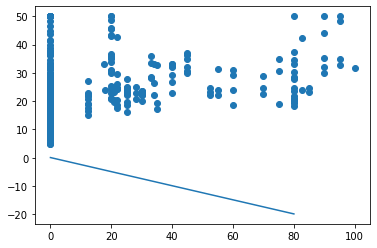

In [392]:
plt.scatter(boston_df[features[1]], boston_df[target])
plt.plot(np.linspace(0, 80, num=81) * lr.coef_[0] + lr.coef_[1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80.])